[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


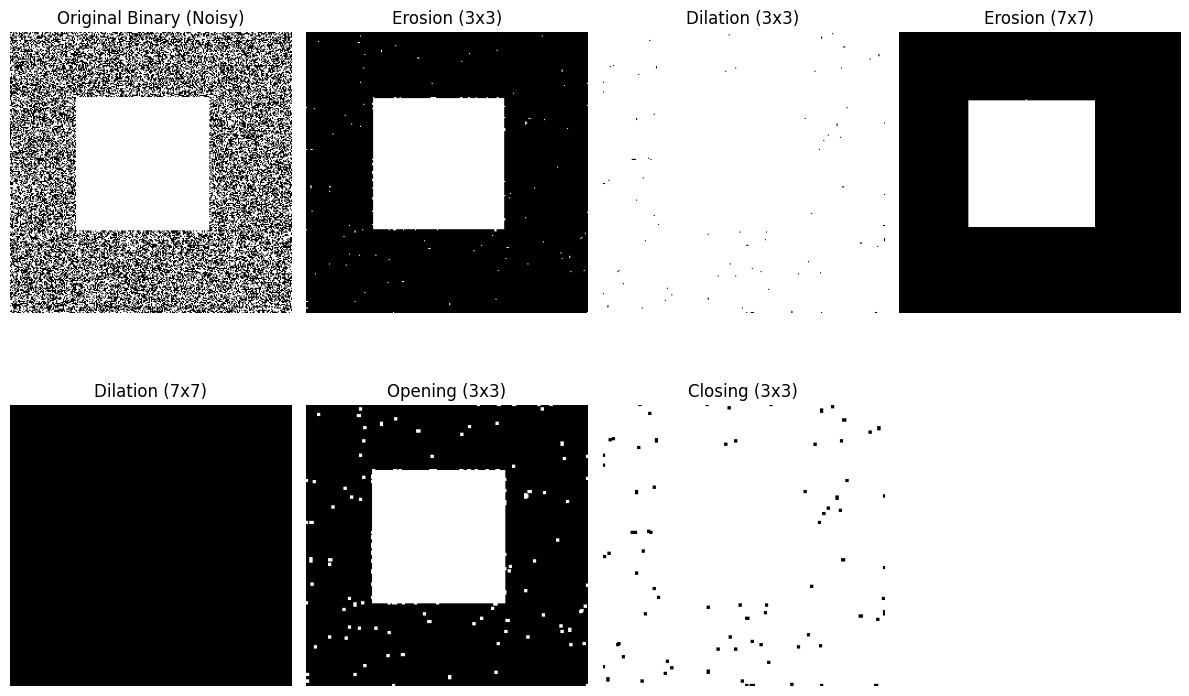

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a binary image with noise
image = np.zeros((256, 256), dtype=np.uint8)
cv2.rectangle(image, (60, 60), (180, 180), 255, -1)  # solid square
noise = np.random.randint(0, 2, (256, 256), dtype=np.uint8) * 255
noisy_image = cv2.bitwise_or(image, noise)  # add random noise

# Define kernels of different sizes
kernel_small = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel_large = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
print(kernel_small)
print(kernel_large)

# Apply erosion and dilation
erosion_small = cv2.erode(noisy_image, kernel_small, iterations=1)
dilation_small = cv2.dilate(noisy_image, kernel_small, iterations=1)

erosion_large = cv2.erode(noisy_image, kernel_large, iterations=1)
dilation_large = cv2.dilate(noisy_image, kernel_large, iterations=1)

# Apply opening and closing
opening = cv2.morphologyEx(noisy_image, cv2.MORPH_OPEN, kernel_small)
closing = cv2.morphologyEx(noisy_image, cv2.MORPH_CLOSE, kernel_small)

# Plot everything
titles = [
    "Original Binary (Noisy)",
    "Erosion (3x3)",
    "Dilation (3x3)",
    "Erosion (7x7)",
    "Dilation (7x7)",
    "Opening (3x3)",
    "Closing (3x3)",
]
images = [
    noisy_image,
    erosion_small,
    dilation_small,
    erosion_large,
    dilation_large,
    opening,
    closing,
]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()